
FedLR Spambase
100% high-quality -> 94.1% full coalition appeared as NE
90% high-quality -> 91.3% full coalition appeared as NE
80% high-quality -> 91.0% full coalition appeared as NE
70% high-quality -> 86.5% full coalition appeared as NE
60% high-quality -> 84.5% full coalition appeared as NE
50% high-quality -> 80.4% full coalition appeared as NE
40% high-quality -> 78.5% full coalition appeared as NE
30% high-quality -> 79.2% full coalition appeared as NE
20% high-quality -> 79.0% full coalition appeared as NE
10% high-quality -> 83.9% full coalition appeared as NE
0% high-quality -> 99.7% full coalition appeared as NE

A lower-bound threshold is approximately 0% high-quality data for which the full coalition is stable at least 90% of the times.

FedFor Spambase
100% high-quality -> 99.5% full coalition appeared as NE
90% high-quality -> 99.6% full coalition appeared as NE
80% high-quality -> 99.5% full coalition appeared as NE
70% high-quality -> 99.7% full coalition appeared as 

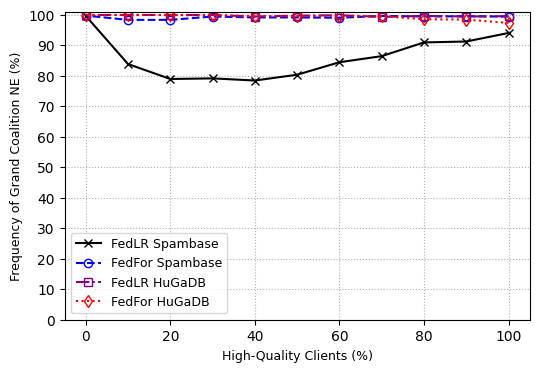

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_file(file, label, sep):
    df = pd.read_csv(file, sep=sep)
    total_runs = 1000

    df["HighQualityPct"] = (10 - df["Number of Bad Clients"]) * 10

    df["StabilityPct"] = (df["0.1"] / total_runs) * 100

    print(f"\n{label}")
    for _, row in df.iterrows():
        hq = row["HighQualityPct"]
        stability = row["StabilityPct"]
        print(f"{hq:.0f}% high-quality -> {stability:.1f}% full coalition appeared as NE")

    eligible = df[df["StabilityPct"] >= 90]["HighQualityPct"]
    if not eligible.empty:
        threshold = eligible.min()
        print(f"\nA lower-bound threshold is approximately {threshold:.0f}% high-quality data "
              "for which the full coalition is stable at least 90% of the times.")


    x = df["HighQualityPct"].tolist()
    y = df["StabilityPct"].tolist()
    return x, y



experiments = [
    { "file": "/.../results/FedLR_Spambase_LQC_0_to_10_with_1000Trials/nash_occurrence_results.csv", "label": "FedLR Spambase", "sep": "," },
    { "file": "/.../results/FedFor_Spambase_LQC_0_to_10_with_1000Trials/nash_occurrence_results.csv", "label": "FedFor Spambase", "sep": "," },
    { "file": "/.../results/FedLR_HuGaDB_LQC_0_to_10_with_1000Trials/nash_occurrence_results.csv", "label": "FedLR HuGaDB", "sep": "," },
    { "file": "/.../results/FedFor_HuGaDB_LQC_0_to_10_with_1000Trials/nash_occurrence_results.csv", "label": "FedFor HuGaDB", "sep": "," }
]

combined_data = []


for exp in experiments:
    x, y = process_file(exp["file"], exp["label"], exp["sep"])
    combined_data.append((x, y, exp["label"]))


plt.figure(figsize=(6, 4))
markers = ['x', 'o', 's', 'd', '*', 'v', '^', '<', '>', 'h', 'D']
colors = ['k', 'b', 'purple', 'red', 'm', 'y', 'cyan']
linestyles = ['-', '--', '-.', ':']

for i, ((x, y, label), marker) in enumerate(zip(combined_data, markers)):
    ls = linestyles[i % len(linestyles)]
    plt.plot(x, y, marker=marker, linestyle=ls, label=label,
             color=colors[i % len(colors)], fillstyle='none')

plt.yticks(np.arange(0, 110, 10))
plt.xlabel("High-Quality Clients (%)", fontsize=9)
plt.ylabel("Frequency of Grand Coalition NE (%)", fontsize=9)
plt.grid(linestyle=':')
plt.legend(fontsize=9)
plt.show()